# Imports

In [0]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read data in

In [0]:
data = pd.read_table('SMSSpamCollection', header = None)
data.columns = ['Label', 'Text']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [0]:
data.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Text Cleaning

In [0]:
# Remove words with numbers, punctuations and reduce text to lowercase
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())



In [0]:
data['Text'] = data.Text.map(alphanumeric).map(punc_lower)

In [0]:
data.head()

,Label,Text
0,ham,go until jurong point crazy available only ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives aro...


# Split data into inputs and outputs
To fit a model, the data should be split into inputs and outputs

Inputs: Features, Independent Variables

Outputs: Outcome, Dependent Variable


In [0]:
# Split data into inputs and outputs
X = data.Text # inputs into the model
y = data.Label # outputs of the model


In [0]:
X.head()

0    go until jurong point  crazy   available only ...
1                        ok lar    joking wif u oni   
2    free entry in   a wkly comp to win fa cup fina...
3    u dun say so early hor    u c already then say   
4    nah i don t think he goes to usf  he lives aro...
Name: Text, dtype: object

In [0]:
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: Label, dtype: object

## Split the data into train and test .


To prevent the issue of overfitting, we divide observations into two sets

• A model is fit on the training data and it is evaluated on the test data

• This way, you can see if the model generalizes well

In [0]:
#Split the data into  train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
# We use test_size = 0.3 to signify the percentage of test data. 

In [0]:
print(X_train.head())
print(X_train.shape)

708      quite late lar    ard   anyway i wun b drivin   
4338                        on a tuesday night r u   real
5029    go chase after her and run her over while she ...
4921     g says you never answer your texts  confirm deny
2592         still work going on  it is very small house 
Name: Text, dtype: object
(3900,)


In [0]:
print(y_train.head())
print(y_train.shape)

708     ham
4338    ham
5029    ham
4921    ham
2592    ham
Name: Label, dtype: object
(3900,)


In [0]:
print(X_test.head())
print(X_test.shape)

3245    squeeeeeze   this is christmas hug   if u lik ...
944     and also i ve sorta blown him off a couple tim...
1044    mmm thats better now i got a roast down me  i...
2484        mm have some kanji dont eat anything heavy ok
812     so there s a ring that comes with the guys cos...
Name: Text, dtype: object
(1672,)


In [0]:
print(y_test.head())
print(y_test.shape)

3245    ham
944     ham
1044    ham
2484    ham
812     ham
Name: Label, dtype: object
(1672,)


## Numerically encode the Input data.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words= 'english' )

X_train_cv = cv.fit_transform(X_train) # fit_transform learns the vocab and one-hot-encodes

X_test_cv = cv.transform(X_test) # transform uses the same vocab and one-hot-encodes

#Print the dimensions of the training set 
print(X_train_cv.toarray().shape)

(3900, 6103)


## Fit model and predict outcomes

In [0]:
# Use a logistic regression model 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#Train the model
lr.fit(X_train_cv, y_train)

#Use the model that was trained on the X_train_cv data and apply to the X_test_cv
y_pred_cv = lr.predict(X_test_cv)
y_pred_cv

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

# Evaluate the model

After fitting a model on the training data and predicting outcomes for the test data, how
do you know if the model is a good fit?

Error Metrics

• Accuracy = (TP + TN) / All

• Precision = TP / (TP + FP)

• Recall = TP / (TP + FN)

• F1 Score = 2*(P*R)/(P+R)

Accuracy: 0.986
Precision: 1.0
Recall: 0.8928571428571429
F1_score: 0.9433962264150945


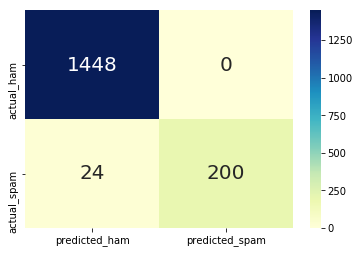

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_cv)

sns.heatmap(cm, xticklabels=['predicted_ham', 'predicted_spam'], yticklabels=['actual_ham', 'actual_spam'], annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

true_negative, false_positive = cm[0]
false_negative, true_positive = cm[1]

accuracy = round((true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative), 3)
precision = round(true_positive / (true_positive + false_positive))
Recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * Recall) / (precision + Recall)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(Recall))
print('F1_score: {}'.format(f1_score))



How good is our model ?

# Naive Bayes

In [0]:
# Using a naive bayes model

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

#Train the model
nb.fit(X_train_cv, y_train)

# Take the trained model and nd apply it to X_test_cv
y_pred_cv_nb = nb.predict(X_test_cv)
y_pred_cv_nb

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

Accuracy: 0.986
Precision: 1.0
Recall: 0.9553571428571429
F1_score: 0.9771689497716896


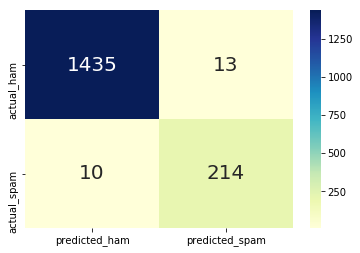

In [0]:
# Results

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_cv_nb)

sns.heatmap(cm, xticklabels=['predicted_ham', 'predicted_spam'], yticklabels=['actual_ham', 'actual_spam'], annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

true_negative, false_positive = cm[0]
false_negative, true_positive = cm[1]

accuracy = round((true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative), 3)
precision = round(true_positive / (true_positive + false_positive))
Recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * Recall) / (precision + Recall)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(Recall))
print('F1_score: {}'.format(f1_score))
